# SO MANY TS DIAGRAMS

the adventures of whether or not they'll be an obvious way to distinguish my water masses

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean as cm
from scipy.interpolate import interpn
import matplotlib.colors as colors
import gsw

In [3]:
def get_data(mydata, starttime, endtime):
    salt = mydata.init_salt[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
    temp = mydata.init_temp[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
#     depth = depthf(mydata.init_z[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]-1.)[0]
    trans = mydata.init_transp[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]/(endtime-starttime+1)
    return salt, temp, trans

In [4]:
def line(x1, x2, y1, y2):
    m = (y2 - y1)/(x2 - x1)
    b = y1 - m*x1
    return m, b

In [5]:
mon16 = ['oct16', 'nov16', 'dec16', 'jan17', 'feb17', 'mar17']
mon_len = [31, 30, 31, 31, 28, 31]
h = 3601
win_start = [h, h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24]
win_end = [h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24, h+sum(mon_len)*24-1]

monS = ['apr', 'may', 'jun', 'jul', 'aug', 'sep']
mon_len = [30, 31, 30, 31, 31, 30]
sum_start = [h, h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24]
sum_end = [h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24, h+sum(mon_len)*24-1]

mon17 = ['oct17', 'nov17', 'dec17', 'jan18', 'feb18', 'mar18'] 

# CIOPS TS match?

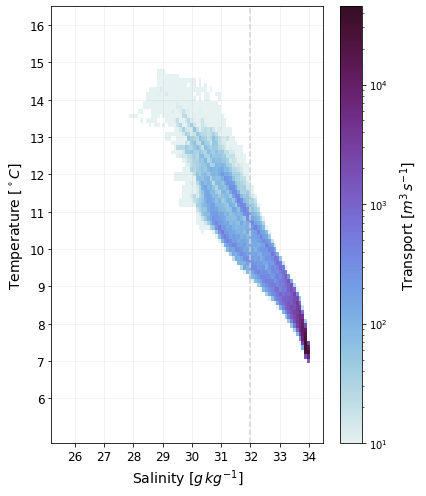

In [5]:
# just summer (june, july, august, september) in one TS diagram
fig, ax = plt.subplots(1,1, figsize=(6,7))
file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_30sep17/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
salt, temp, trans = get_data(mydata, sum_start[2], sum_end[-1])

bins = [np.linspace(25.2,34.6,100),np.linspace(4.8,16.6,100)]
# logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
H, xedges, yedges=np.histogram2d(salt,temp,weights=trans,bins=bins)
H = H.T
H_final = np.where(H>0, H, H*np.nan)
cmap = cm.cm.dense
cmap.set_bad('white')
X, Y = np.meshgrid(xedges, yedges)
im = ax.pcolormesh(X, Y, H_final, cmap=cmap, norm=colors.LogNorm(vmin=10, vmax=45000))
cb = fig.colorbar(im, ax=ax)
cb.set_label('Transport [$m^{3}\,s^{-1}$]', labelpad=10, fontsize=14)
ax.plot([32,32],[4.8, 16.5],ls='dashed',c='lightgrey')
ax.set_ylabel('Temperature [$^\circ C$]', fontsize=14)
ax.set_xlabel('Salinity [$g\,kg^{-1}$]', fontsize=14)
ax.set_yticks(np.arange(6,17,1))
ax.set_yticklabels(np.arange(6,17,1),fontsize=12)
ax.set_xticks(np.arange(26,35,1))
ax.set_xticklabels(np.arange(26,35,1),fontsize=12)
ax.grid(color='gray',alpha=0.1)
ax.set_ylim([4.8, 16.5])
ax.set_xlim([25.2, 34.5])

plt.tight_layout()
plt.savefig("./figures/SummerTS.pdf")

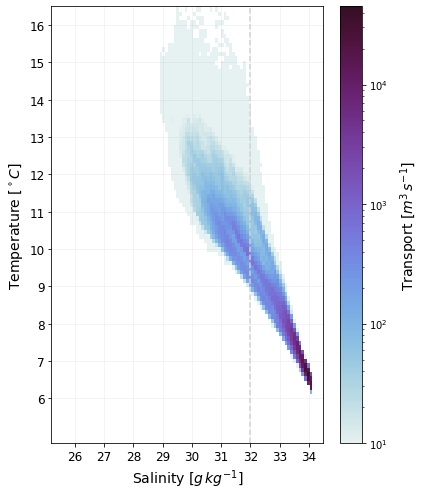

In [6]:
# summer SSC in one TS diagram
# 2017
fig, ax = plt.subplots(1,1, figsize=(6,7))
yearjumps = [0,1,-2,1,0,1,0,1,1,0,1,0]
str_mo = ['jan', 'feb', 'mar', 'apr','may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec']
ssc_sum_start = 1+(5*720+(sum(yearjumps[:5+1]*24)))
ssc_sum_end = 720+(8*720+(sum(yearjumps[:8+1]*24)))

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_1hr/forward_01jan17/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
salt = mydata.init_salt[(mydata.init_t >= ssc_sum_start) & (mydata.init_t <= ssc_sum_end)]
temp = mydata.init_temp[(mydata.init_t >= ssc_sum_start) & (mydata.init_t <= ssc_sum_end)]
starttime = ssc_sum_start
endtime = ssc_sum_end
trans = mydata.init_transp[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]/(endtime-starttime+1)

bins = [np.linspace(25.2,34.6,100),np.linspace(4.8,16.6,100)]

H, xedges, yedges=np.histogram2d(salt,temp,weights=trans,bins=bins)#,norm=LogNorm())
H = H.T
H_final = np.where(H>0, H, H*np.nan)
cmap = cm.cm.dense
cmap.set_bad('white')
X, Y = np.meshgrid(xedges, yedges)
im = ax.pcolormesh(X, Y, H_final, cmap=cmap, norm=colors.LogNorm(vmin=10, vmax=45000))
cb = fig.colorbar(im, ax=ax)
cb.set_label('Transport [$m^{3}\,s^{-1}$]', labelpad=10, fontsize=14)
ax.plot([32,32],[4.8, 16.5],ls='dashed',c='lightgrey')
ax.set_ylabel('Temperature [$^\circ C$]', fontsize=14)
ax.set_xlabel('Salinity [$g\,kg^{-1}$]', fontsize=14)
ax.set_yticks(np.arange(6,17,1))
ax.set_yticklabels(np.arange(6,17,1),fontsize=12)
ax.set_xticks(np.arange(26,35,1))
ax.set_xticklabels(np.arange(26,35,1),fontsize=12)
ax.grid(color='gray',alpha=0.1)
ax.set_ylim([4.8, 16.5])
ax.set_xlim([25.2, 34.5])

plt.tight_layout()
plt.savefig("./figures/SummerSSCTS.pdf")

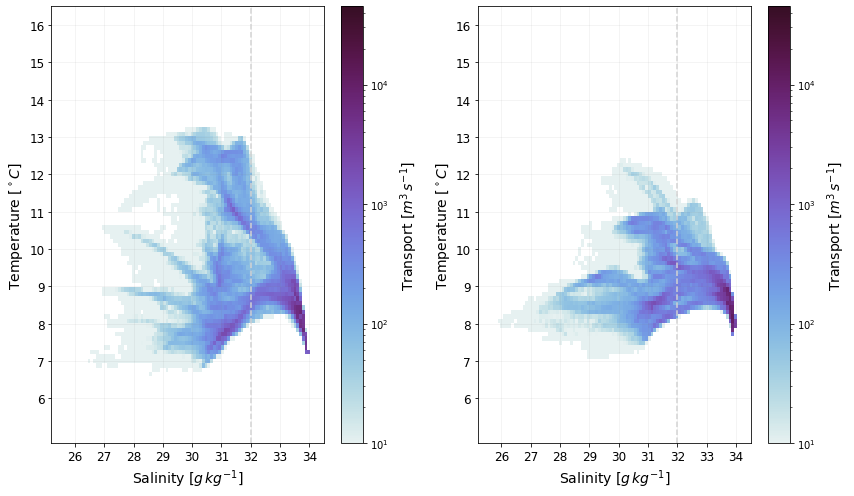

In [8]:
# winters seperately
fig, ax = plt.subplots(1,2, figsize=(12,7))

time = win_end[-1] - win_start[0] + 1 + sum_end[1] - sum_start[0] + 1

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar17/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
saltW16 = mydata.init_salt[(mydata.init_t >= win_start[0]) & (mydata.init_t <= win_end[-1])]
tempW16 = mydata.init_temp[(mydata.init_t >= win_start[0]) & (mydata.init_t <= win_end[-1])]
endtime, starttime = win_end[-1], win_start[0]
transW16 = mydata.init_transp[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]/time

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_30sep17/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
saltS = mydata.init_salt[(mydata.init_t >= sum_start[0]) & (mydata.init_t <= sum_end[1])]
tempS = mydata.init_temp[(mydata.init_t >= sum_start[0]) & (mydata.init_t <= sum_end[1])]
endtime, starttime = sum_end[1], sum_start[0]
transS = mydata.init_transp[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]/time

salt = np.append(saltW16, saltS)
temp = np.append(tempW16, tempS)
trans = np.append(transW16, transS)

bins = [np.linspace(25.2,34.6,100),np.linspace(4.8,16.6,100)]
        
H, xedges, yedges=np.histogram2d(salt,temp,weights=trans,bins=bins)#,norm=LogNorm())
H = H.T
H_final = np.where(H>0, H, H*np.nan)
cmap = cm.cm.dense
cmap.set_bad('white')
X, Y = np.meshgrid(xedges, yedges)
im = ax[0].pcolormesh(X, Y, H_final, cmap=cmap, norm=colors.LogNorm(vmin=10, vmax=45000))
cb = fig.colorbar(im, ax=ax[0])
cb.set_label('Transport [$m^{3}\,s^{-1}$]', labelpad=10, fontsize=14)
ax[0].plot([32,32],[4.8, 16.5],ls='dashed',c='lightgrey')
ax[0].set_ylabel('Temperature [$^\circ C$]', fontsize=14)
ax[0].set_xlabel('Salinity [$g\,kg^{-1}$]', fontsize=14)
ax[0].set_yticks(np.arange(6,17,1))
ax[0].set_yticklabels(np.arange(6,17,1),fontsize=12)
ax[0].set_xticks(np.arange(26,35,1))
ax[0].set_xticklabels(np.arange(26,35,1),fontsize=12)
ax[0].grid(color='gray',alpha=0.1)
ax[0].set_ylim([4.8, 16.5])
ax[0].set_xlim([25.2, 34.5])

# all winter 2017/18
file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar18/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
salt = mydata.init_salt[(mydata.init_t >= win_start[0]) & (mydata.init_t <= win_end[-1])]
temp = mydata.init_temp[(mydata.init_t >= win_start[0]) & (mydata.init_t <= win_end[-1])]

endtime, starttime = win_end[-1], win_start[0]
time = endtime-starttime+1
trans = mydata.init_transp[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]/time

H, xedges, yedges=np.histogram2d(salt,temp,weights=trans,bins=bins)#,norm=LogNorm())
H = H.T
H_final = np.where(H>0, H, H*np.nan)
cmap = cm.cm.dense
cmap.set_bad('white')
X, Y = np.meshgrid(xedges, yedges)
im = ax[1].pcolormesh(X, Y, H_final, cmap=cmap, norm=colors.LogNorm(vmin=10, vmax=45000))
cb = fig.colorbar(im, ax=ax[1])
cb.set_label('Transport [$m^{3}\,s^{-1}$]', labelpad=10, fontsize=14)
ax[1].plot([32,32],[4.8, 16.5],ls='dashed',c='lightgrey')
ax[1].set_ylabel('Temperature [$^\circ C$]', fontsize=14)
ax[1].set_xlabel('Salinity [$g\,kg^{-1}$]', fontsize=14)
ax[1].set_yticks(np.arange(6,17,1))
ax[1].set_yticklabels(np.arange(6,17,1),fontsize=12)
ax[1].set_xticks(np.arange(26,35,1))
ax[1].set_xticklabels(np.arange(26,35,1),fontsize=12)
ax[1].grid(color='gray',alpha=0.1)
ax[1].set_ylim([4.8, 16.5])
ax[1].set_xlim([25.2, 34.5])

plt.tight_layout()
# plt.tight_layout()
plt.savefig("./figures/WinterTS.pdf")

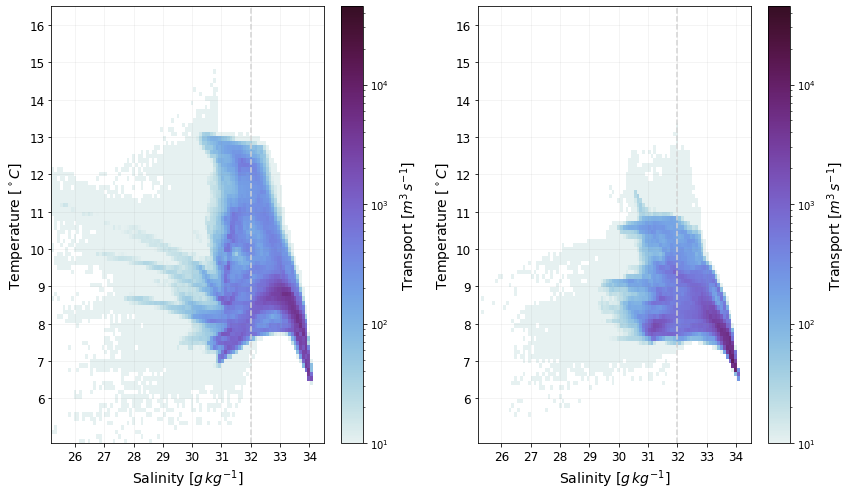

In [9]:
### SSC winters
fig, ax = plt.subplots(1,2, figsize=(12,7))

# 2016/17

yearjumps = [0,1,-2,1,0,1,0,1,1,0,1,0]
str_mo = ['jan', 'feb', 'mar', 'apr','may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec']
ssc_win_start = 1+(9*720+(sum(yearjumps[:9+1]*24)))
ssc_win_end = 720+(11*720+(sum(yearjumps[:11+1]*24)))

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_1hr/forward_01jan16/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
saltW16 = mydata.init_salt[(mydata.init_t >= ssc_win_start) & (mydata.init_t <= ssc_win_end)]
tempW16 = mydata.init_temp[(mydata.init_t >= ssc_win_start) & (mydata.init_t <= ssc_win_end)]
starttime = ssc_win_start
endtime = ssc_win_end
transW16 = mydata.init_transp[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]/time

ssc_win_start = 1+(0*720+(sum(yearjumps[:0+1]*24)))
ssc_win_end = 720+(4*720+(sum(yearjumps[:4+1]*24)))

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_1hr/forward_01jan17/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
saltS = mydata.init_salt[(mydata.init_t >= ssc_win_start) & (mydata.init_t <= ssc_win_end)]
tempS = mydata.init_temp[(mydata.init_t >= ssc_win_start) & (mydata.init_t <= ssc_win_end)]
starttime = ssc_win_start
endtime = ssc_win_end
transS = mydata.init_transp[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]/time

salt = np.append(saltW16, saltS)
temp = np.append(tempW16, tempS)
trans = np.append(transW16, transS)

bins = [np.linspace(25.2,34.6,100),np.linspace(4.8,16.6,100)]

H, xedges, yedges=np.histogram2d(salt,temp,weights=trans,bins=bins)#,norm=LogNorm())
H = H.T
H_final = np.where(H>0, H, H*np.nan)
cmap = cm.cm.dense
cmap.set_bad('white')
X, Y = np.meshgrid(xedges, yedges)
im = ax[0].pcolormesh(X, Y, H_final, cmap=cmap, norm=colors.LogNorm(vmin=10, vmax=45000))
cb = fig.colorbar(im, ax=ax[0])
cb.set_label('Transport [$m^{3}\,s^{-1}$]', labelpad=10, fontsize=14)
ax[0].plot([32,32],[4.8, 16.5],ls='dashed',c='lightgrey')
ax[0].set_ylabel('Temperature [$^\circ C$]', fontsize=14)
ax[0].set_xlabel('Salinity [$g\,kg^{-1}$]', fontsize=14)
ax[0].set_yticks(np.arange(6,17,1))
ax[0].set_yticklabels(np.arange(6,17,1),fontsize=12)
ax[0].set_xticks(np.arange(26,35,1))
ax[0].set_xticklabels(np.arange(26,35,1),fontsize=12)
ax[0].grid(color='gray',alpha=0.1)
ax[0].set_ylim([4.8, 16.5])
ax[0].set_xlim([25.2, 34.5])

# 2017/18
# SSC same period
yearjumps = [0,1,-2,1,0,1,0,1,1,0,1,0]
ssc_win_start = 1+(9*720+(sum(yearjumps[:9+1]*24)))
ssc_win_end = 720+(11*720+(sum(yearjumps[:11+1]*24)))
time = ssc_win_end - ssc_win_start + 1 + 720*3

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_1hr/forward_01jan17/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
salt17 = mydata.init_salt[(mydata.init_t >= ssc_win_start) & (mydata.init_t <= ssc_win_end)]
temp17 = mydata.init_temp[(mydata.init_t >= ssc_win_start) & (mydata.init_t <= ssc_win_end)]
starttime = ssc_win_start
endtime = ssc_win_end
trans17 = mydata.init_transp[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]/time

start = 1
end = 720

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_1hr/forward_01jan18/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
salt_jan = mydata.init_salt[(mydata.init_t >= start) & (mydata.init_t <= end)]
temp_jan = mydata.init_temp[(mydata.init_t >= start) & (mydata.init_t <= end)]
trans_jan = mydata.init_transp[(mydata.init_t >= start) & (mydata.init_t <= end)]/time

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_1hr/forward_01feb18/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
salt_feb = mydata.init_salt[(mydata.init_t >= start) & (mydata.init_t <= end)]
temp_feb = mydata.init_temp[(mydata.init_t >= start) & (mydata.init_t <= end)]
trans_feb = mydata.init_transp[(mydata.init_t >= start) & (mydata.init_t <= end)]/time

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_1hr/forward_01mar18/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
salt_mar = mydata.init_salt[(mydata.init_t >= start) & (mydata.init_t <= end)]
temp_mar = mydata.init_temp[(mydata.init_t >= start) & (mydata.init_t <= end)]
trans_mar = mydata.init_transp[(mydata.init_t >= start) & (mydata.init_t <= end)]/time

salt = np.append(np.append(np.append(salt17, salt_jan), salt_feb), salt_mar)
temp = np.append(np.append(np.append(temp17, temp_jan), temp_feb), temp_mar)
trans = np.append(np.append(np.append(trans17, trans_jan), trans_feb), trans_mar)

H, xedges, yedges=np.histogram2d(salt,temp,weights=trans,bins=bins)#,norm=LogNorm())
H = H.T
H_final = np.where(H>0, H, H*np.nan)
cmap = cm.cm.dense
cmap.set_bad('white')
X, Y = np.meshgrid(xedges, yedges)
im = ax[1].pcolormesh(X, Y, H_final, cmap=cmap, norm=colors.LogNorm(vmin=10, vmax=45000))
cb = fig.colorbar(im, ax=ax[1])
cb.set_label('Transport [$m^{3}\,s^{-1}$]', labelpad=10, fontsize=14)
ax[1].plot([32,32],[4.8, 16.5],ls='dashed',c='lightgrey')
ax[1].set_ylabel('Temperature [$^\circ C$]', fontsize=14)
ax[1].set_xlabel('Salinity [$g\,kg^{-1}$]', fontsize=14)
ax[1].set_yticks(np.arange(6,17,1))
ax[1].set_yticklabels(np.arange(6,17,1),fontsize=12)
ax[1].set_xticks(np.arange(26,35,1))
ax[1].set_xticklabels(np.arange(26,35,1),fontsize=12)
ax[1].grid(color='gray',alpha=0.1)
ax[1].set_ylim([4.8, 16.5])
ax[1].set_xlim([25.2, 34.5])

plt.tight_layout()
plt.savefig("./figures/WinterSSCTS.pdf")

<a id=south-shelf-and-CUC-flow></a>
## TS diagrams of south shelf and CUC flow

In [6]:
def get_data_south(mydata, starttime, endtime):
    Sshelf = 5
    Sslope = 4
    # saltdiv = 32
    
    
    salt = mydata.final_salt[np.logical_or((mydata.final_section==Sshelf),(mydata.final_section==Sslope)) & (mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
    temp = mydata.final_temp[np.logical_or((mydata.final_section==Sshelf),(mydata.final_section==Sslope)) & (mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
    trans = mydata.final_transp[np.logical_or((mydata.final_section==Sshelf),(mydata.final_section==Sslope)) & (mydata.init_t >= starttime) & (mydata.init_t <= endtime)]/(endtime-starttime+1)
    depth = (mydata.final_depth[np.logical_or((mydata.final_section==Sshelf),(mydata.final_section==Sslope)) & (mydata.init_t >= starttime) & (mydata.init_t <= endtime)]-1.)
    
    return salt, temp, trans, depth

In [7]:
def get_data_south_sep(mydata, starttime, endtime, sdep, deep):
    Sshelf = 5
    Sslope = 4
    saltdiv = 32
    offcut = 595
    
    if deep == False:
        salt = mydata.init_salt[np.logical_or((mydata.final_section==Sshelf),(mydata.final_section==Sslope)) & (mydata.final_depth > sdep) & (mydata.final_x > offcut) & (mydata.init_salt >= saltdiv) & (mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
        temp = mydata.init_temp[np.logical_or((mydata.final_section==Sshelf),(mydata.final_section==Sslope)) & (mydata.final_depth > sdep) & (mydata.final_x > offcut) & (mydata.init_salt >= saltdiv) & (mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
        trans = mydata.init_transp[np.logical_or((mydata.final_section==Sshelf),(mydata.final_section==Sslope)) & (mydata.final_depth > sdep) & (mydata.final_x > offcut) & (mydata.init_salt >= saltdiv) & (mydata.init_t >= starttime) & (mydata.init_t <= endtime)]/(endtime-starttime+1)
#         depth = (mydata.final_z[np.logical_or((mydata.final_section==Sshelf),(mydata.final_section==Sslope)) & (mydata.final_depth > sdep) & (mydata.final_x > offcut) & (mydata.init_salt >= saltdiv) & (mydata.init_t >= starttime) & (mydata.init_t <= endtime)]-1.)
    if deep == True:
        salt = mydata.init_salt[np.logical_or((mydata.final_section==Sshelf),(mydata.final_section==Sslope)) & (mydata.final_depth <= sdep) & (mydata.final_x > offcut) & (mydata.init_salt >= saltdiv) & (mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
        temp = mydata.init_temp[np.logical_or((mydata.final_section==Sshelf),(mydata.final_section==Sslope)) & (mydata.final_depth <= sdep) & (mydata.final_x > offcut) & (mydata.init_salt >= saltdiv) & (mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
        trans = mydata.init_transp[np.logical_or((mydata.final_section==Sshelf),(mydata.final_section==Sslope)) & (mydata.final_depth <= sdep) & (mydata.final_x > offcut) & (mydata.init_salt >= saltdiv) & (mydata.init_t >= starttime) & (mydata.init_t <= endtime)]/(endtime-starttime+1)
#         depth = (mydata.final_z[np.logical_or((mydata.final_section==Sshelf),(mydata.final_section==Sslope)) & (mydata.final_depth <= sdep) & (mydata.final_x > offcut) & (mydata.init_salt >= saltdiv) & (mydata.init_t >= starttime) & (mydata.init_t <= endtime)]-1.)    
    
    return salt, temp, trans

In [8]:
# I want to add lines of constant density to see if there's a correlation between the water masses we see and density
bins = [np.linspace(28, 35.5,100),np.linspace(6, 14,100)]
SA, t = np.meshgrid(bins[0],bins[1])
# don't acutally want the density to be pressure denpendent for this purpose so make artificial P
p = np.array([50 for i in range(np.shape(SA)[0]*np.shape(SA)[1])])
p = p.reshape(100,100)

CT = np.zeros(np.shape(p))
rho = np.zeros(np.shape(p))
spice = np.zeros(np.shape(p))

for i in range(np.shape(p)[0]): 
    CT[i,:] = gsw.CT_from_t(SA[i,:],t[i,:],p[i,:])
    rho[i,:] = gsw.rho_alpha_beta(SA[i,:], CT[i,:], p[i,:])[0]
    spice[i,:] = gsw.spiciness0(SA[i,:], CT[i,:])

In [9]:
def fmt(x):
    x-=1000
    s = f"{x:.0f}"
    return rf"{s}"

Text(0.5, 1.0, 'Winters')

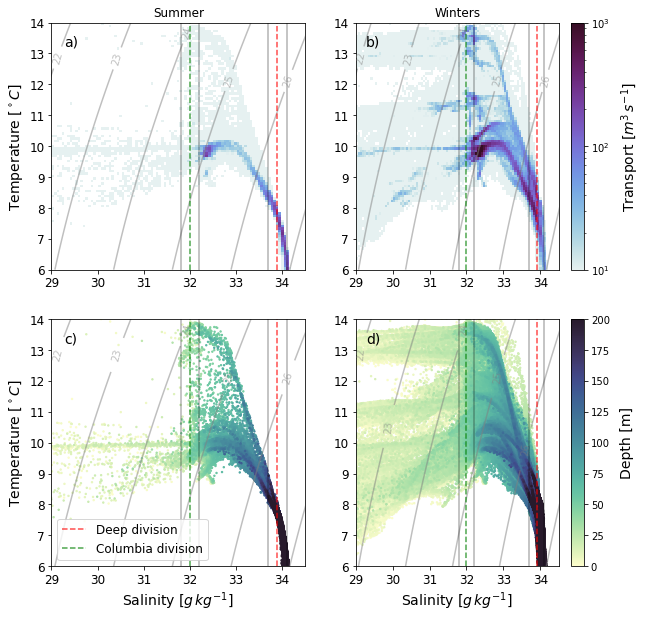

In [14]:
# south only
fig, ax = plt.subplots(2,2, figsize=(10,10))
file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_30sep17/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
salt, temp, trans, depth = get_data_south(mydata, sum_start[2], sum_end[-1])

# first summer, coloured by transport
bins = [np.linspace(29,34.6,100),np.linspace(6,14.01,100)]

H, xedges, yedges=np.histogram2d(salt,temp,weights=trans,bins=bins)
H = H.T
H_final = np.where(H>0, H, H*np.nan)
cmap = cm.cm.dense
cmap.set_bad('white')
X, Y = np.meshgrid(xedges, yedges)
im = ax[0,0].pcolormesh(X, Y, H_final, cmap=cmap, norm=colors.LogNorm(vmin=10, vmax=1000))
ax[0,0].set_ylabel('Temperature [$^\circ C$]', fontsize=14)
# cb = fig.colorbar(im, ax=ax[0])
# cb.set_label('Transport [$m^{3}\,s^{-1}$]', labelpad=10, fontsize=14)

# and coloured by depth
cmap = cm.cm.deep
idx = depth.argsort()
salt, temp, depth = salt[idx][::-1], temp[idx][::-1], depth[idx][::-1]*-1
sc=ax[1,0].scatter(salt,temp,c=depth, cmap=cmap,s=2, vmin=0, vmax=200)
ax[1,0].set_ylabel('Temperature [$^\circ C$]', fontsize=14)
ax[1,0].set_xlabel('Salinity [$g\,kg^{-1}$]', fontsize=14)

# second for winter
time = win_end[-1] - win_start[0] + 1 + sum_end[1] - sum_start[0] + 1

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar17/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
saltW16, tempW16, transW16, depthW16 = get_data_south(mydata, win_start[0], win_end[-1])

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_30sep17/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
saltS, tempS, transS, depthS = get_data_south(mydata, sum_start[0], sum_end[1])

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar18/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
saltW17, tempW17, transW17, depthW17  = get_data_south(mydata, win_start[0], win_end[-1])

salt = np.append((np.append(saltW16, saltS)), saltW17)
temp = np.append((np.append(tempW16, tempS)), tempW17)
trans = np.append((np.append(transW16, transS)), transW17)
depth = np.append((np.append(depthW16, depthS)), depthW17)

H, xedges, yedges=np.histogram2d(salt,temp,weights=trans,bins=bins)
H = H.T
H_final = np.where(H>0, H, H*np.nan)
cmap = cm.cm.dense
cmap.set_bad('white')
X, Y = np.meshgrid(xedges, yedges)
im = ax[0,1].pcolormesh(X, Y, H_final, cmap=cmap, norm=colors.LogNorm(vmin=10, vmax=1000))
cb = fig.colorbar(im, ax=ax[0,1])
cb.set_label('Transport [$m^{3}\,s^{-1}$]', labelpad=10, fontsize=14)

# and depth in winter
cmap = cm.cm.deep
idx = depth.argsort()
salt, temp, depth = salt[idx][::-1], temp[idx][::-1], depth[idx][::-1]*-1
sc=ax[1,1].scatter(salt,temp,c=depth, cmap=cmap,s=2, vmin=0, vmax=200)
cb = fig.colorbar(sc, ax=ax[1,1])
cb.set_label('Depth [m]', labelpad=10, fontsize=14)
ax[1,1].set_xlabel('Salinity [$g\,kg^{-1}$]', fontsize=14)

letter = ['a)', 'b)','c)','d)']
ii=[0,0,1,1]
jj=[0,1,0,1]
for k in range(4):
    CS=ax[ii[k],jj[k]].contour(SA,t,rho,colors = 'gray', alpha=0.5)
    ax[ii[k],jj[k]].clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)
    ax[ii[k],jj[k]].set_yticks(np.arange(6,17,1))
    ax[ii[k],jj[k]].set_yticklabels(np.arange(6,17,1),fontsize=12)
    ax[ii[k],jj[k]].set_xticks(np.arange(26,35,1))
    ax[ii[k],jj[k]].set_xticklabels(np.arange(26,35,1),fontsize=12)
    ax[ii[k],jj[k]].set_ylim([6, 14])
    ax[ii[k],jj[k]].set_xlim([29, 34.5])

    # division between water masses
    ax[ii[k],jj[k]].plot([33.9,33.9],[6,14],'r--', alpha=0.7, label='Deep division')
    ax[ii[k],jj[k]].plot([34.1,34.1],[6,14],'k', alpha=0.3)
    ax[ii[k],jj[k]].plot([33.7,33.7],[6,14],'k', alpha=0.3)

    # columbia delineation
    ax[ii[k],jj[k]].plot([32,32],[6,14],'g--',alpha=0.7,label='Columbia division')
    ax[ii[k],jj[k]].plot([32.2,32.2],[6,14],'k', alpha=0.3)
    ax[ii[k],jj[k]].plot([31.8,31.8],[6,14],'k', alpha=0.3)

    #text
    plt.text(.05, .95, letter[k], ha='left', va='top', transform=ax[ii[k],jj[k]].transAxes, fontsize=14)

ax[1,0].legend(loc='lower left', fontsize=12)
ax[0,0].set_title('Summer', fontsize=12)
ax[0,1].set_title('Winters', fontsize=12)
# plt.tight_layout()


Text(0.5, 1.0, 'Winters')

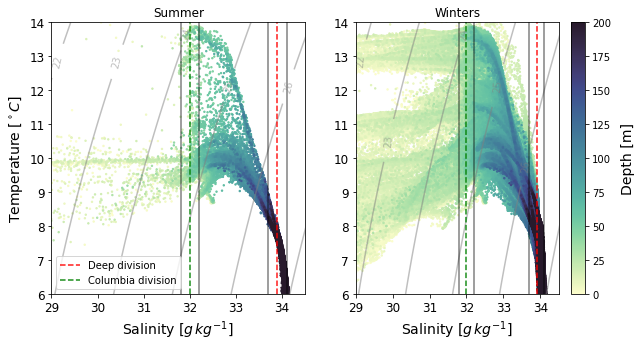

In [18]:
# south only
cmap = cm.cm.deep

fig, ax = plt.subplots(1,2, figsize=(10,5))
file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_30sep17/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
salt, temp, trans, depth = get_data_south(mydata, sum_start[2], sum_end[-1])

# first summer, coloured by depth
bins = [np.linspace(29,34.6,100),np.linspace(6,14.01,100)]

idx = depth.argsort()
salt, temp, depth = salt[idx][::-1], temp[idx][::-1], depth[idx][::-1]*-1
sc=ax[0].scatter(salt,temp,c=depth, cmap=cmap,s=2, vmin=0, vmax=200)
ax[0].set_ylabel('Temperature [$^\circ C$]', fontsize=14)

# second for winter
time = win_end[-1] - win_start[0] + 1 + sum_end[1] - sum_start[0] + 1

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar17/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
saltW16, tempW16, transW16, depthW16 = get_data_south(mydata, win_start[0], win_end[-1])

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_30sep17/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
saltS, tempS, transS, depthS = get_data_south(mydata, sum_start[0], sum_end[1])

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar18/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
saltW17, tempW17, transW17, depthW17  = get_data_south(mydata, win_start[0], win_end[-1])

salt = np.append((np.append(saltW16, saltS)), saltW17)
temp = np.append((np.append(tempW16, tempS)), tempW17)
trans = np.append((np.append(transW16, transS)), transW17)
depth = np.append((np.append(depthW16, depthS)), depthW17)

idx = depth.argsort()
salt, temp, depth = salt[idx][::-1], temp[idx][::-1], depth[idx][::-1]*-1
sc=ax[1].scatter(salt,temp,c=depth, cmap=cmap,s=2, vmin=0, vmax=200)
cb = fig.colorbar(sc, ax=ax[1])
cb.set_label('Depth [m]', labelpad=10, fontsize=14)

for axs in ax:
    CS=axs.contour(SA,t,rho,colors = 'gray', alpha=0.5)
    axs.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)
    axs.set_xlabel('Salinity [$g\,kg^{-1}$]', fontsize=14)
    axs.set_yticks(np.arange(6,17,1))
    axs.set_yticklabels(np.arange(6,17,1),fontsize=12)
    axs.set_xticks(np.arange(26,35,1))
    axs.set_xticklabels(np.arange(26,35,1),fontsize=12)
    axs.set_ylim([6, 14])
    axs.set_xlim([29, 34.5])

    # division between water masses
    axs.plot([33.9,33.9],[6,14],'r--', alpha=0.9, label='Deep division')
    axs.plot([34.1,34.1],[6,14],'k', alpha=0.5)
    axs.plot([33.7,33.7],[6,14],'k', alpha=0.5)

    # columbia delineation
    axs.plot([32,32],[6,14],'g--',alpha=0.9,label='Columbia division')
    axs.plot([32.2,32.2],[6,14],'k', alpha=0.5)
    axs.plot([31.8,31.8],[6,14],'k', alpha=0.5)

ax[0].legend(loc='lower left')
ax[0].set_title('Summer')
ax[1].set_title('Winters')